# Python Numerical Tools

（Mostly copied from "10 Minutes to pandas": 
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

## 3. pandas

In [1]:
# Customarily, we import as follows:
import numpy as np
import pandas as pd

### Object Creation

In [2]:
# Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.369167,-0.250133,-0.039882,1.242364
2013-01-02,-0.033890,0.655124,0.372349,-0.675445
2013-01-03,0.334118,-0.612260,0.454504,-0.539395
2013-01-04,0.575445,1.394056,1.042800,-0.746862
2013-01-05,-1.124419,0.674378,0.442430,0.741442
2013-01-06,-1.466285,-0.236999,-0.465496,1.896023


In [5]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.

df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
#The columns of the resulting DataFrame have different dtypes.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled.

### Viewing Data

Here is how to view the top and bottom rows of the frame:


In [7]:
df.head()

,A,B,C,D
2013-01-01,-1.369167,-0.250133,-0.039882,1.242364
2013-01-02,-0.033890,0.655124,0.372349,-0.675445
2013-01-03,0.334118,-0.612260,0.454504,-0.539395
2013-01-04,0.575445,1.394056,1.042800,-0.746862
2013-01-05,-1.124419,0.674378,0.442430,0.741442


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,0.575445,1.394056,1.042800,-0.746862
2013-01-05,-1.124419,0.674378,0.442430,0.741442
2013-01-06,-1.466285,-0.236999,-0.465496,1.896023


Display the index, columns:

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.values gives a NumPy representation of the underlying data. Note that his can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.values, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.values is fast and doesn’t require copying data.

In [11]:
df.values

array([[-1.36916727, -0.25013271, -0.03988245,  1.24236372],
       [-0.03389005,  0.65512386,  0.37234944, -0.67544508],
       [ 0.33411821, -0.61225964,  0.45450421, -0.53939498],
       [ 0.57544476,  1.39405599,  1.04279984, -0.74686187],
       [-1.12441905,  0.67437775,  0.44242976,  0.74144223],
       [-1.46628474, -0.236999  , -0.46549649,  1.89602336]])

For df2, the DataFrame with multiple dtypes, DataFrame.values is relatively expensive.

In [12]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)



**Note**

DataFrame.values does not include the index or column labels in the output. 

describe() shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.514033,0.270694,0.301117,0.319688
std,0.910765,0.759119,0.510420,1.129591
min,-1.466285,-0.612260,-0.465496,-0.746862
25%,-1.307980,-0.246849,0.063176,-0.641433
50%,-0.579155,0.209062,0.407390,0.101024
75%,0.242116,0.669564,0.451486,1.117133
max,0.575445,1.394056,1.042800,1.896023


Transposing your data:

In [14]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.369167,-0.033890,0.334118,0.575445,-1.124419,-1.466285
B,-0.250133,0.655124,-0.612260,1.394056,0.674378,-0.236999
C,-0.039882,0.372349,0.454504,1.042800,0.442430,-0.465496
D,1.242364,-0.675445,-0.539395,-0.746862,0.741442,1.896023


Sorting by an axis:

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.242364,-0.039882,-0.250133,-1.369167
2013-01-02,-0.675445,0.372349,0.655124,-0.033890
2013-01-03,-0.539395,0.454504,-0.612260,0.334118
2013-01-04,-0.746862,1.042800,1.394056,0.575445
2013-01-05,0.741442,0.442430,0.674378,-1.124419
2013-01-06,1.896023,-0.465496,-0.236999,-1.466285


Sorting by values:

In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,0.334118,-0.612260,0.454504,-0.539395
2013-01-01,-1.369167,-0.250133,-0.039882,1.242364
2013-01-06,-1.466285,-0.236999,-0.465496,1.896023
2013-01-02,-0.033890,0.655124,0.372349,-0.675445
2013-01-05,-1.124419,0.674378,0.442430,0.741442
2013-01-04,0.575445,1.394056,1.042800,-0.746862


### Selection

**Note**

While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc. 

#### Getting

Selecting a single column, which yields a Series, equivalent to df.A:

In [17]:
df['A']

2013-01-01   -1.369167
2013-01-02   -0.033890
2013-01-03    0.334118
2013-01-04    0.575445
2013-01-05   -1.124419
2013-01-06   -1.466285
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.


In [18]:
df[0:3]

,A,B,C,D
2013-01-01,-1.369167,-0.250133,-0.039882,1.242364
2013-01-02,-0.033890,0.655124,0.372349,-0.675445
2013-01-03,0.334118,-0.612260,0.454504,-0.539395


In [19]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.033890,0.655124,0.372349,-0.675445
2013-01-03,0.334118,-0.612260,0.454504,-0.539395
2013-01-04,0.575445,1.394056,1.042800,-0.746862


#### Selection by Label

For getting a cross section using a label:

In [20]:
df.loc[dates[0]]

A   -1.369167
B   -0.250133
C   -0.039882
D    1.242364
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [21]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-1.369167,-0.250133
2013-01-02,-0.033890,0.655124
2013-01-03,0.334118,-0.612260
2013-01-04,0.575445,1.394056
2013-01-05,-1.124419,0.674378
2013-01-06,-1.466285,-0.236999


Showing label slicing, both endpoints are included:

In [22]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.033890,0.655124
2013-01-03,0.334118,-0.612260
2013-01-04,0.575445,1.394056


Reduction in the dimensions of the returned object:

In [23]:
df.loc['20130102', ['A', 'B']]

A   -0.033890
B    0.655124
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [24]:
df.loc[dates[0], 'A']

-1.369167266047756

For getting fast access to a scalar (equivalent to the prior method):

In [25]:
df.at[dates[0], 'A']

-1.369167266047756

#### Selection by Position

Select via the position of the passed integers:

In [26]:
df.iloc[3]

A    0.575445
B    1.394056
C    1.042800
D   -0.746862
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.575445,1.394056
2013-01-05,-1.124419,0.674378


By lists of integer position locations, similar to the numpy/python style:

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.033890,0.372349
2013-01-03,0.334118,0.454504
2013-01-05,-1.124419,0.442430


For slicing rows explicitly:

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.033890,0.655124,0.372349,-0.675445
2013-01-03,0.334118,-0.612260,0.454504,-0.539395


For slicing columns explicitly:

In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.250133,-0.039882
2013-01-02,0.655124,0.372349
2013-01-03,-0.612260,0.454504
2013-01-04,1.394056,1.042800
2013-01-05,0.674378,0.442430
2013-01-06,-0.236999,-0.465496


For getting a value explicitly:

In [31]:
df.iloc[1, 1]

0.6551238588910568

For getting fast access to a scalar (equivalent to the prior method):

In [32]:
df.iat[1, 1]

0.6551238588910568

#### Boolean Indexing

Using a single column’s values to select data.

In [33]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.334118,-0.612260,0.454504,-0.539395
2013-01-04,0.575445,1.394056,1.042800,-0.746862


Selecting values from a DataFrame where a boolean condition is met.

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,1.242364
2013-01-02,NaN,0.655124,0.372349,NaN
2013-01-03,0.334118,NaN,0.454504,NaN
2013-01-04,0.575445,1.394056,1.042800,NaN
2013-01-05,NaN,0.674378,0.442430,0.741442
2013-01-06,NaN,NaN,NaN,1.896023


Using the isin() method for filtering:

In [35]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.369167,-0.250133,-0.039882,1.242364,one
2013-01-02,-0.033890,0.655124,0.372349,-0.675445,one
2013-01-03,0.334118,-0.612260,0.454504,-0.539395,two
2013-01-04,0.575445,1.394056,1.042800,-0.746862,three
2013-01-05,-1.124419,0.674378,0.442430,0.741442,four
2013-01-06,-1.466285,-0.236999,-0.465496,1.896023,three


In [36]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.334118,-0.612260,0.454504,-0.539395,two
2013-01-05,-1.124419,0.674378,0.442430,0.741442,four


#### Setting

Setting a new column automatically aligns the data by the indexes.

In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-1.369167,-0.250133,-0.039882,1.242364,NaN
2013-01-02,-0.033890,0.655124,0.372349,-0.675445,1.0
2013-01-03,0.334118,-0.612260,0.454504,-0.539395,2.0
2013-01-04,0.575445,1.394056,1.042800,-0.746862,3.0
2013-01-05,-1.124419,0.674378,0.442430,0.741442,4.0
2013-01-06,-1.466285,-0.236999,-0.465496,1.896023,5.0


In [39]:
#setting values by label:
df.at[dates[0], 'A'] = 0

#Setting values by position:
df.iat[0, 1] = 0

#Setting by assigning with a NumPy array:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.039882,5,NaN
2013-01-02,-0.033890,0.655124,0.372349,5,1.0
2013-01-03,0.334118,-0.612260,0.454504,5,2.0
2013-01-04,0.575445,1.394056,1.042800,5,3.0
2013-01-05,-1.124419,0.674378,0.442430,5,4.0
2013-01-06,-1.466285,-0.236999,-0.465496,5,5.0


A where operation with setting.

In [40]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.039882,-5,NaN
2013-01-02,-0.033890,-0.655124,-0.372349,-5,-1.0
2013-01-03,-0.334118,-0.612260,-0.454504,-5,-2.0
2013-01-04,-0.575445,-1.394056,-1.042800,-5,-3.0
2013-01-05,-1.124419,-0.674378,-0.442430,-5,-4.0
2013-01-06,-1.466285,-0.236999,-0.465496,-5,-5.0


#### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [41]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.039882,5,NaN,1.0
2013-01-02,-0.033890,0.655124,0.372349,5,1.0,1.0
2013-01-03,0.334118,-0.612260,0.454504,5,2.0,NaN
2013-01-04,0.575445,1.394056,1.042800,5,3.0,NaN


To drop any rows that have missing data.

In [42]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.03389,0.655124,0.372349,5,1.0,1.0


Filling missing data.

In [43]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.039882,5,5.0,1.0
2013-01-02,-0.033890,0.655124,0.372349,5,1.0,1.0
2013-01-03,0.334118,-0.612260,0.454504,5,2.0,5.0
2013-01-04,0.575445,1.394056,1.042800,5,3.0,5.0


To get the boolean mask where values are nan.

In [44]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


#### Operations

##### Stats

Operations in general exclude missing data.

Performing a descriptive statistic:

In [45]:
df.mean()

A   -0.285838
B    0.312383
C    0.301117
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [46]:
df.mean(1)

2013-01-01    1.240029
2013-01-02    1.398717
2013-01-03    1.435273
2013-01-04    2.202460
2013-01-05    1.798478
2013-01-06    1.566244
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [47]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [48]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.039882,5,NaN
2013-01-02,-0.033890,0.655124,0.372349,5,1.0
2013-01-03,0.334118,-0.612260,0.454504,5,2.0
2013-01-04,0.575445,1.394056,1.042800,5,3.0
2013-01-05,-1.124419,0.674378,0.442430,5,4.0
2013-01-06,-1.466285,-0.236999,-0.465496,5,5.0


In [49]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.665882,-1.612260,-0.545496,4.0,1.0
2013-01-04,-2.424555,-1.605944,-1.957200,2.0,0.0
2013-01-05,-6.124419,-4.325622,-4.557570,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


#### Apply

Applying functions to the data:

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.039882,5,NaN
2013-01-02,-0.033890,0.655124,0.372349,5,1.0
2013-01-03,0.334118,-0.612260,0.454504,5,2.0
2013-01-04,0.575445,1.394056,1.042800,5,3.0
2013-01-05,-1.124419,0.674378,0.442430,5,4.0
2013-01-06,-1.466285,-0.236999,-0.465496,5,5.0


In [51]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.039882,5,NaN
2013-01-02,-0.033890,0.655124,0.332467,10,1.0
2013-01-03,0.300228,0.042864,0.786971,15,3.0
2013-01-04,0.875673,1.436920,1.829771,20,6.0
2013-01-05,-0.248746,2.111298,2.272201,25,10.0
2013-01-06,-1.715031,1.874299,1.806704,30,15.0


In [52]:
df.apply(lambda x: x.max() - x.min())

A    2.041729
B    2.006316
C    1.508296
D    0.000000
F    4.000000
dtype: float64

#### Histogramming

In [53]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    3
2    0
3    3
4    0
5    4
6    6
7    6
8    0
9    2
dtype: int64

In [54]:
s.value_counts()

0    3
6    2
3    2
4    1
2    1
1    1
dtype: int64

#### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [55]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

#### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [56]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.413163,0.322259,-1.101446,-0.403111
1,0.689601,1.624318,-0.782450,-1.448095
2,0.288474,1.012260,1.332107,1.570134
3,-0.475652,1.919624,0.660243,-0.046973
4,0.242829,1.133554,0.536587,-0.107887
5,-1.407482,-0.834451,1.088725,-0.181752
6,-1.029110,0.657216,-0.030803,1.820743
7,-0.972541,1.712637,-0.237416,0.761717
8,-0.923527,-0.349522,1.981653,0.958078
9,0.217168,0.281249,0.775952,0.969313


In [57]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

,0,1,2,3
0,-0.413163,0.322259,-1.101446,-0.403111
1,0.689601,1.624318,-0.782450,-1.448095
2,0.288474,1.012260,1.332107,1.570134


In [58]:
pd.concat(pieces)

,0,1,2,3
0,-0.413163,0.322259,-1.101446,-0.403111
1,0.689601,1.624318,-0.782450,-1.448095
2,0.288474,1.012260,1.332107,1.570134
3,-0.475652,1.919624,0.660243,-0.046973
4,0.242829,1.133554,0.536587,-0.107887
5,-1.407482,-0.834451,1.088725,-0.181752
6,-1.029110,0.657216,-0.030803,1.820743
7,-0.972541,1.712637,-0.237416,0.761717
8,-0.923527,-0.349522,1.981653,0.958078
9,0.217168,0.281249,0.775952,0.969313


#### Join

SQL style merges.

In [59]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [60]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [61]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [62]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [63]:
left


,key,lval
0,foo,1
1,bar,2


In [64]:
right

,key,rval
0,foo,4
1,bar,5


In [65]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### Append

Append rows to a dataframe

In [66]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.097795,-2.097083,0.724811,0.388879
1,-0.844350,1.108966,2.065404,-0.361289
2,-0.316249,-1.001274,-0.317354,1.337289
3,0.000809,1.734175,0.853684,0.530838
4,-0.244476,1.643456,0.449083,0.755179
5,-0.017771,1.222994,-2.157520,0.211370
6,-0.915380,-0.002131,-1.068230,-1.572611
7,0.398459,0.902410,-0.088347,-0.041798


In [67]:
s = df.iloc[3]

In [68]:
 df.append(s, ignore_index=True)

,A,B,C,D
0,0.097795,-2.097083,0.724811,0.388879
1,-0.844350,1.108966,2.065404,-0.361289
2,-0.316249,-1.001274,-0.317354,1.337289
3,0.000809,1.734175,0.853684,0.530838
4,-0.244476,1.643456,0.449083,0.755179
5,-0.017771,1.222994,-2.157520,0.211370
6,-0.915380,-0.002131,-1.068230,-1.572611
7,0.398459,0.902410,-0.088347,-0.041798
8,0.000809,1.734175,0.853684,0.530838


### Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [69]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
 
df

,A,B,C,D
0,foo,one,-1.448430,-1.298084
1,bar,one,-1.567195,0.971814
2,foo,two,1.262527,-1.060154
3,bar,three,-0.226197,1.070456
4,foo,two,-0.588718,0.863230
5,bar,two,0.256672,0.392281
6,foo,one,-0.046144,-1.378196
7,foo,three,1.170609,-0.634151


Grouping and then applying the sum() function to the resulting groups.

In [70]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.536720,2.434551
foo,0.349845,-3.507355


### Reshaping

#### Stack

In [71]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
 

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.553498 -1.485610
      two    -0.589826 -0.149230
baz   one     1.944281 -0.499046
      two     0.213832  0.681998

The stack() method “compresses” a level in the DataFrame’s columns.

In [72]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.553498
               B   -1.485610
       two     A   -0.589826
               B   -0.149230
baz    one     A    1.944281
               B   -0.499046
       two     A    0.213832
               B    0.681998
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [73]:
stacked.unstack()

A         B
first second                    
bar   one     1.553498 -1.485610
      two    -0.589826 -0.149230
baz   one     1.944281 -0.499046
      two     0.213832  0.681998

In [74]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.553498 -0.589826
      B -1.485610 -0.149230
baz   A  1.944281  0.213832
      B -0.499046  0.681998

In [75]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.553498  1.944281
       B -1.485610 -0.499046
two    A -0.589826  0.213832
       B -0.149230  0.681998

#### Pivot Tables

In [76]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})
 
df

,A,B,C,D,E
0,one,A,foo,-0.794902,0.815232
1,one,B,foo,-1.428887,1.568681
2,two,C,foo,-0.579324,-0.779124
3,three,A,bar,-0.744300,1.185769
4,one,B,bar,-0.801538,-1.749989
5,one,C,bar,-1.131172,1.679236
6,two,A,foo,0.580434,1.896457
7,three,B,foo,-0.323530,-0.040455
8,one,C,foo,-0.241052,-1.764522
9,one,A,bar,-2.020031,0.680507


We can produce pivot tables from this data very easily:

In [77]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -2.020031 -0.794902
      B -0.801538 -1.428887
      C -1.131172 -0.241052
three A -0.744300       NaN
      B       NaN -0.323530
      C -1.053055       NaN
two   A       NaN  0.580434
      B  0.669265       NaN
      C       NaN -0.579324

### Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [78]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    221
2012-01-01 00:00:01    269
2012-01-01 00:00:02    271
2012-01-01 00:00:03    475
2012-01-01 00:00:04    390
2012-01-01 00:00:05    336
2012-01-01 00:00:06    373
2012-01-01 00:00:07    450
2012-01-01 00:00:08     39
2012-01-01 00:00:09     28
2012-01-01 00:00:10    338
2012-01-01 00:00:11    228
2012-01-01 00:00:12    113
2012-01-01 00:00:13    487
2012-01-01 00:00:14    117
2012-01-01 00:00:15    457
2012-01-01 00:00:16    264
2012-01-01 00:00:17    114
2012-01-01 00:00:18    168
2012-01-01 00:00:19    214
2012-01-01 00:00:20    207
2012-01-01 00:00:21    200
2012-01-01 00:00:22    186
2012-01-01 00:00:23    300
2012-01-01 00:00:24    292
2012-01-01 00:00:25    378
2012-01-01 00:00:26    484
2012-01-01 00:00:27    349
2012-01-01 00:00:28    285
2012-01-01 00:00:29    322
                      ... 
2012-01-01 00:01:10    373
2012-01-01 00:01:11    499
2012-01-01 00:01:12    266
2012-01-01 00:01:13    149
2012-01-01 00:01:14    329
2012-01-01 00:01:15    272
2

In [79]:
ts.resample('5Min').sum()

2012-01-01    23608
Freq: 5T, dtype: int64

Time zone representation:


In [80]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.479828
2012-03-07   -0.233442
2012-03-08    0.409264
2012-03-09   -1.148081
2012-03-10    0.080708
Freq: D, dtype: float64

In [81]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.479828
2012-03-07 00:00:00+00:00   -0.233442
2012-03-08 00:00:00+00:00    0.409264
2012-03-09 00:00:00+00:00   -1.148081
2012-03-10 00:00:00+00:00    0.080708
Freq: D, dtype: float64

Converting to another time zone:

In [82]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.479828
2012-03-06 19:00:00-05:00   -0.233442
2012-03-07 19:00:00-05:00    0.409264
2012-03-08 19:00:00-05:00   -1.148081
2012-03-09 19:00:00-05:00    0.080708
Freq: D, dtype: float64

Converting between time span representations:

In [83]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.482092
2012-02-29   -0.105497
2012-03-31    1.167939
2012-04-30    0.691077
2012-05-31   -0.609694
Freq: M, dtype: float64

In [84]:
ps = ts.to_period()
ps

2012-01   -0.482092
2012-02   -0.105497
2012-03    1.167939
2012-04    0.691077
2012-05   -0.609694
Freq: M, dtype: float64

In [85]:
ps.to_timestamp()

2012-01-01   -0.482092
2012-02-01   -0.105497
2012-03-01    1.167939
2012-04-01    0.691077
2012-05-01   -0.609694
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [86]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.head()

1990Q1    1.029502
1990Q2    1.167128
1990Q3    0.758620
1990Q4    0.175176
1991Q1    1.658006
Freq: Q-NOV, dtype: float64

In [87]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    1.029502
1990-06-01 09:00    1.167128
1990-09-01 09:00    0.758620
1990-12-01 09:00    0.175176
1991-03-01 09:00    1.658006
Freq: H, dtype: float64

### Categoricals

pandas can include categorical data in a DataFrame.

In [88]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                    "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [89]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [90]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

In [91]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                               "good", "very good"])

In [92]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [93]:
df.sort_values(by="grade", ascending=False)

,id,raw_grade,grade
4,5,a,very good
3,4,a,very good
0,1,a,very good
2,3,b,good
1,2,b,good
5,6,e,very bad


Grouping by a categorical column also shows empty categories.

In [94]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting

In [95]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:



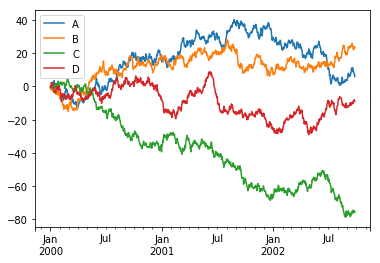

In [96]:
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
 
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

###Getting Data In/Out

#### CSV

Writing to a csv file.

In [97]:
df.to_csv('../output/foo.csv')

In [98]:
pd.read_csv('../output/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.493779,-1.058323,-0.551773,-0.021639
1,2000-01-02,-1.253781,-1.998250,-0.548142,-0.688142
2,2000-01-03,-1.473226,-1.646114,-0.037386,0.897288
3,2000-01-04,-0.974486,-1.933001,-1.085351,2.243723
4,2000-01-05,-0.388384,-1.574011,-0.691895,1.647307
5,2000-01-06,-0.305253,-1.630913,0.611887,1.688799
6,2000-01-07,-0.870879,-2.087926,0.247267,2.412960
7,2000-01-08,-1.152947,-1.988408,0.212838,1.724061
8,2000-01-09,-2.130997,-1.541437,0.749340,1.588259
9,2000-01-10,-1.920864,-2.539647,-0.351583,0.850847


#### HDF5

Reading and writing to HDFStores.

Writing to a HDF5 Store.
(May need to install module pytables, on Windows/Anaconda, open conda prompt, run "conda install -c conda-forge pytables")

In [99]:
df.to_hdf('../output/foo.h5', 'df')

Reading from a HDF5 Store.

In [100]:
pd.read_hdf('../output/foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.493779,-1.058323,-0.551773,-0.021639
2000-01-02,-1.253781,-1.998250,-0.548142,-0.688142
2000-01-03,-1.473226,-1.646114,-0.037386,0.897288
2000-01-04,-0.974486,-1.933001,-1.085351,2.243723
2000-01-05,-0.388384,-1.574011,-0.691895,1.647307
2000-01-06,-0.305253,-1.630913,0.611887,1.688799
2000-01-07,-0.870879,-2.087926,0.247267,2.412960
2000-01-08,-1.152947,-1.988408,0.212838,1.724061
2000-01-09,-2.130997,-1.541437,0.749340,1.588259
2000-01-10,-1.920864,-2.539647,-0.351583,0.850847


#### Excel

Reading and writing to MS Excel.

(May need to instal module openpyxl)

Writing to an excel file.

In [101]:
df.to_excel('../output/foo.xlsx', sheet_name='Sheet1')


Reading from an excel file.

In [102]:
pd.read_excel('../output/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.493779,-1.058323,-0.551773,-0.021639
2000-01-02,-1.253781,-1.998250,-0.548142,-0.688142
2000-01-03,-1.473226,-1.646114,-0.037386,0.897288
2000-01-04,-0.974486,-1.933001,-1.085351,2.243723
2000-01-05,-0.388384,-1.574011,-0.691895,1.647307
2000-01-06,-0.305253,-1.630913,0.611887,1.688799
2000-01-07,-0.870879,-2.087926,0.247267,2.412960
2000-01-08,-1.152947,-1.988408,0.212838,1.724061
2000-01-09,-2.130997,-1.541437,0.749340,1.588259
2000-01-10,-1.920864,-2.539647,-0.351583,0.850847


### Gotchas

If you are attempting to perform an operation you might see an exception like:

In [103]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().